# About this repo:
- This repository includes a Python automation script that demonstrates data cleaning, merging, statistical analysis, and automated reporting.

# Tools/libraries used:
- pandas
- numpy
- Matplotlib

# Reference
- [github.com/tillscripts](https://www.github.com/tillscripts)

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
#Import data from drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Reference filepath of data from drive
filepath_1 = "/content/drive/MyDrive/data/customers.csv"
filepath_2 = "/content/drive/MyDrive/data/transactions.csv"

# Read the CSV files into dataFrames
customers = pd.read_csv(filepath_1)
transactions = pd.read_csv(filepath_2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



📊 DESCRIPTIVE STATISTICS
----------------------------------------
Mean Transaction Value   : 272.00
Median Transaction Value : 250.00
Std Deviation            : 145.73

📈 AVERAGE TRANSACTION VALUE BY GENDER
----------------------------------------
gender
Female     291.25
Male       228.75
Unknown    320.00
Name: transaction_value, dtype: float64

📐 HYPOTHESIS TEST (Male vs Female)
----------------------------------------
T-statistic : -0.8172
P-value     : 0.4295
Conclusion  : No statistically significant difference detected.


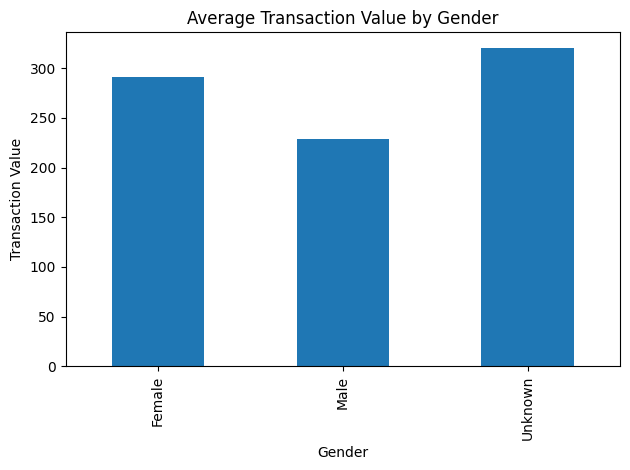

In [ ]:
# Data cleaning
customers = customers.drop_duplicates()
transactions = transactions.drop_duplicates()

customers["age"] = customers["age"].fillna(customers["age"].median())
customers["gender"] = customers["gender"].fillna("Unknown")
transactions["amount"] = transactions["amount"].fillna(0)

# Merge datasets
data = pd.merge(transactions, customers, on="customer_id", how="left")
data["transaction_value"] = data["quantity"] * data["amount"]

# Statistical Analysis
mean_value = data["transaction_value"].mean()
median_value = data["transaction_value"].median()
std_value = data["transaction_value"].std()

gender_summary = data.groupby("gender")["transaction_value"].mean()

male_values = data[data["gender"] == "Male"]["transaction_value"]
female_values = data[data["gender"] == "Female"]["transaction_value"]

t_stat, p_value = stats.ttest_ind(
    male_values.dropna(),
    female_values.dropna(),
    equal_var=False
)

# Output (Generate summary report)
print("\n📊 DESCRIPTIVE STATISTICS")
print("-" * 40)
print(f"Mean Transaction Value   : {mean_value:.2f}")
print(f"Median Transaction Value : {median_value:.2f}")
print(f"Std Deviation            : {std_value:.2f}")

print("\n📈 AVERAGE TRANSACTION VALUE BY GENDER")
print("-" * 40)
print(gender_summary)

print("\n📐 HYPOTHESIS TEST (Male vs Female)")
print("-" * 40)
print(f"T-statistic : {t_stat:.4f}")
print(f"P-value     : {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion  : Statistically significant difference detected.")
else:
    print("Conclusion  : No statistically significant difference detected.")

# Visualization with matplotlib (plt)
plt.figure()
gender_summary.plot(kind="bar")
plt.title("Average Transaction Value by Gender")
plt.ylabel("Transaction Value")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()
